In [374]:
import warnings

import pandas   as pd
import numpy    as np
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder

In [375]:
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (4, 2)})

<Axes: xlabel='G3', ylabel='Count'>

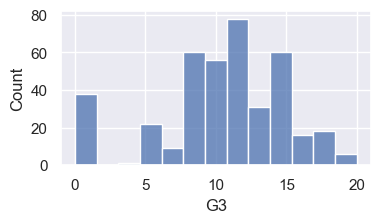

In [376]:
data =pd.read_csv('student-mat.csv')
sns.histplot(data['G3'])

<Axes: xlabel='G1', ylabel='Count'>

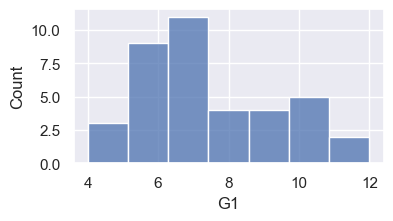

In [377]:
sns.histplot(data[data['G3'] == 0]['G1'])

<Axes: xlabel='G3', ylabel='Count'>

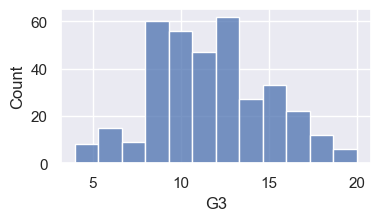

In [378]:
data = data[data["G3"] != 0]
sns.histplot(data["G3"])

In [379]:
X = data.drop('G3', axis=1)
y = data['G3']

In [380]:
X_train, X_test, Y_train,y_test = train_test_split(X, y, test_size=50, random_state=0)

In [381]:
X_y_train =X_train.copy(deep=True)
X_y_train['y'] =Y_train

X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

X_y_train

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
295,GP,M,17,U,GT3,T,3,3,health,other,...,yes,yes,no,4,4,3,5,4,14,11
224,GP,F,16,U,GT3,T,4,4,teacher,services,...,yes,yes,no,5,3,2,5,0,13,14
197,GP,M,16,R,LE3,T,3,3,teacher,other,...,yes,yes,no,3,3,4,3,8,9,10
231,GP,M,17,R,GT3,T,2,2,other,other,...,yes,yes,no,4,5,2,1,4,11,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,4,1,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,MS,F,17,U,LE3,A,3,2,services,other,...,yes,no,yes,1,2,3,5,2,12,11
210,GP,F,19,U,GT3,T,3,3,other,other,...,yes,yes,no,4,3,3,3,10,8,8
117,GP,M,16,U,GT3,T,3,3,other,services,...,yes,yes,no,5,4,2,5,0,13,13
47,GP,M,16,U,GT3,T,4,3,health,services,...,yes,yes,no,4,2,2,2,4,19,20


<Axes: xlabel='G1', ylabel='y'>

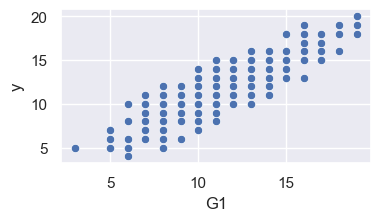

In [382]:
sns.scatterplot(x=X_y_train['G1'], y=X_y_train['y'])

In [383]:
non_numeric_data = X_y_train.select_dtypes(exclude="number")
non_numeric_data.columns

Index(['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [384]:
def get_target_encoded_column(train, test, x_name, y_name):
    encoder = TargetEncoder()
    test[x_name] = test[x_name].astype('category')
    encoder.fit(train[x_name], train[y_name])
    train_result =  encoder.transform(train[x_name])
    test_result =   encoder.transform(test[x_name])
    train[x_name] = train_result
    test[x_name] = test_result
    return train, test

In [385]:
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'Mjob', 'y')
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'Fjob', 'y')
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'higher', 'y')
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'schoolsup', 'y')
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'guardian', 'y')
X_y_train, X_y_test = get_target_encoded_column(X_y_train, X_y_test, 'reason', 'y')
pd.reset_option('^display.', silent=True)
X_y_test
# X_y_test.columns == X_y_train.columns

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
6,GP,M,16,U,LE3,T,2,2,10.963057,11.339181,...,11.657627,yes,no,4,4,4,3,0,12,11
152,GP,F,15,R,GT3,T,3,3,12.251790,11.476373,...,11.657627,yes,yes,4,2,1,3,8,10,10
330,GP,M,18,U,LE3,T,2,2,10.963057,11.339181,...,11.657627,yes,no,4,5,5,5,2,9,8
240,GP,M,17,U,LE3,T,4,3,12.781907,11.339181,...,11.657627,yes,yes,2,5,5,5,14,12,12
90,GP,F,16,U,GT3,T,3,3,10.963057,11.339181,...,11.657627,yes,yes,4,3,3,4,0,7,8
251,GP,M,16,U,GT3,T,3,3,10.695357,11.339181,...,11.657627,yes,no,5,3,3,2,6,7,10
114,GP,M,15,R,GT3,T,2,1,12.781907,11.476373,...,11.657627,yes,yes,5,4,2,5,8,9,9
60,GP,F,16,R,GT3,T,4,4,12.781907,12.723082,...,11.657627,no,no,2,4,4,4,6,10,11
37,GP,M,16,R,GT3,A,4,4,10.963057,12.723082,...,11.657627,yes,yes,2,4,3,5,7,15,15
324,GP,F,17,U,LE3,T,0,2,10.695357,11.631663,...,11.657627,yes,no,3,3,3,2,0,16,15


In [386]:
columns_to_binary_encode = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'internet', 'romantic', 'famsup', 'paid', 'activities', 'nursery']
binary_encoder = OneHotEncoder(drop='first', sparse=False, dtype=int)
binary_encoder.fit(X_y_train[columns_to_binary_encode])
X_y_train[columns_to_binary_encode] =   binary_encoder.transform(X_y_train[columns_to_binary_encode])
X_y_test[columns_to_binary_encode] =   binary_encoder.transform(X_y_test[columns_to_binary_encode])
# X_test[columns_to_binary_encode] =      binary_encoder.transform(X_test[columns_to_binary_encode])
# X_y_test

# X_y_train = X_y_train.drop(['age'], axis=1)


,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,G1,y
6,0,1,16,1,1,1,2,2,10.963057,11.339181,...,11.657627,1,0,4,4,4,3,0,12,11
152,0,0,15,0,0,1,3,3,12.251790,11.476373,...,11.657627,1,1,4,2,1,3,8,10,10
330,0,1,18,1,1,1,2,2,10.963057,11.339181,...,11.657627,1,0,4,5,5,5,2,9,8
240,0,1,17,1,1,1,4,3,12.781907,11.339181,...,11.657627,1,1,2,5,5,5,14,12,12
90,0,0,16,1,0,1,3,3,10.963057,11.339181,...,11.657627,1,1,4,3,3,4,0,7,8
251,0,1,16,1,0,1,3,3,10.695357,11.339181,...,11.657627,1,0,5,3,3,2,6,7,10
114,0,1,15,0,0,1,2,1,12.781907,11.476373,...,11.657627,1,1,5,4,2,5,8,9,9
60,0,0,16,0,0,1,4,4,12.781907,12.723082,...,11.657627,0,0,2,4,4,4,6,10,11
37,0,1,16,0,0,0,4,4,10.963057,12.723082,...,11.657627,1,1,2,4,3,5,7,15,15
324,0,0,17,1,1,1,0,2,10.695357,11.631663,...,11.657627,1,0,3,3,3,2,0,16,15


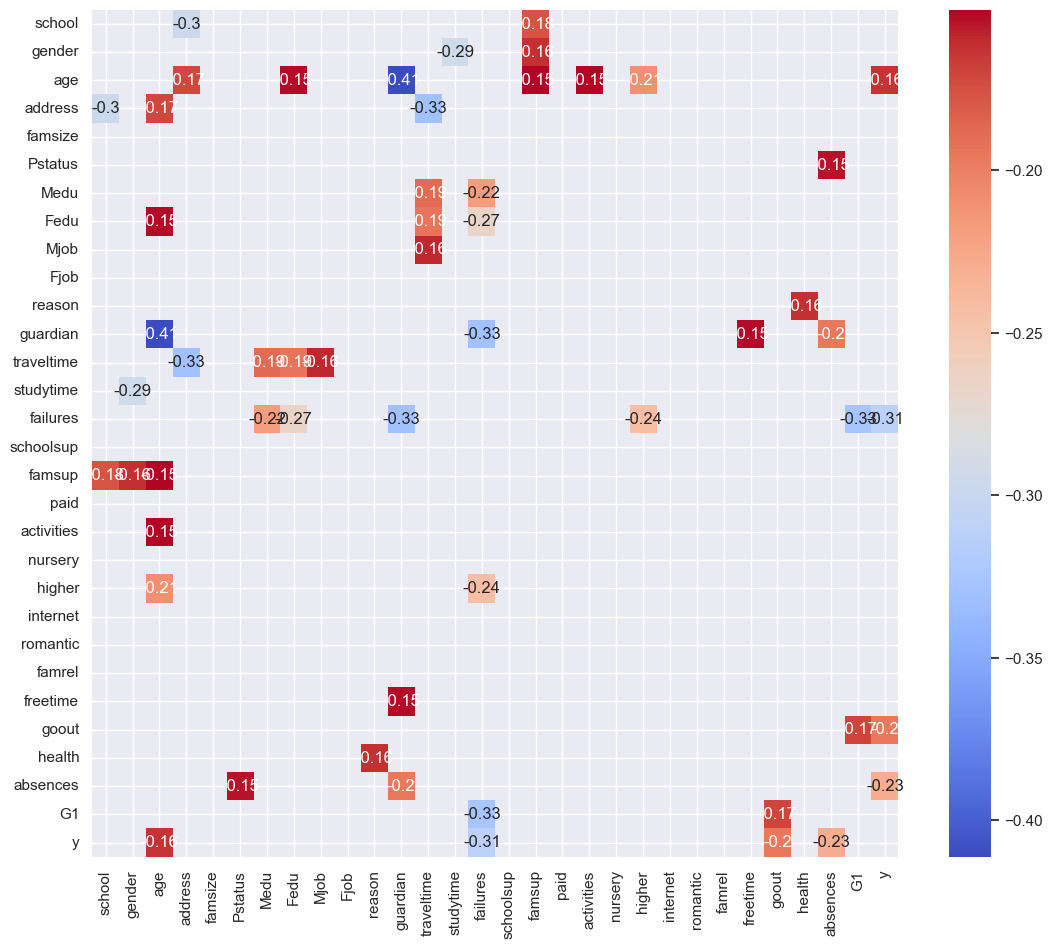

In [387]:
sns.set(rc={'figure.figsize': (10, 5)})
corr = X_y_train.corr()
# corr = corr[(corr > 0.2) | (corr < -0.2)]
corr = corr[(corr < -0.15)]
sns.set(rc={'figure.figsize': (13, 11)})
sns.heatmap(corr, cmap='coolwarm', annot=True)
sns.set(rc={'figure.figsize': (5, 4)})

In [393]:
most_corr_factors = ['G1', 'Mjob', 'schoolsup', 'Fjob', 'studytime', 'failures', 'absences', 'goout']
X_train = X_y_train[most_corr_factors]
X_test = X_y_test[most_corr_factors]

In [400]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [401]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
model.score(X_train_scaled, Y_train)

0.8208196941735776

In [403]:
model.score(X_test_scaled, y_test)

0.7328476890655257